In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv', index_col='Airline_Name')
data.shape

(515, 7)

In [3]:
data.head()

,Food_&_Beverages,Inflight_Entertainment,Seat_Comfort,Staff_Service,Value_for_Money,Review_Count,Rating
Airline_Name,,,,,,,
AB Aviation,2,0,3,3,2,3,4
Adria Airways,3,2,3,3,3,91,6
Aegean Airlines,4,2,4,4,4,605,8
Aer Lingus,3,2,3,4,3,789,6
Aero VIP,0,0,4,4,4,3,9


In [4]:
data.tail()

,Food_&_Beverages,Inflight_Entertainment,Seat_Comfort,Staff_Service,Value_for_Money,Review_Count,Rating
Airline_Name,,,,,,,
XL Airways France,3,2,2,3,3,78,5
Yakutia Airlines,3,0,3,3,4,4,6
Yangon Airways,4,0,5,4,4,4,9
Yemenia,0,0,0,0,4,24,4
Yeti Airlines,3,0,3,3,4,3,6


In [5]:
data.corr()

,Food_&_Beverages,Inflight_Entertainment,Seat_Comfort,Staff_Service,Value_for_Money,Review_Count,Rating
Food_&_Beverages,1.000000,0.422183,0.642930,0.684761,0.463847,0.080438,0.517388
Inflight_Entertainment,0.422183,1.000000,0.300042,0.299429,0.146917,0.327153,0.146295
Seat_Comfort,0.642930,0.300042,1.000000,0.851193,0.618845,0.020238,0.625659
Staff_Service,0.684761,0.299429,0.851193,1.000000,0.597290,0.017322,0.613897
Value_for_Money,0.463847,0.146917,0.618845,0.597290,1.000000,-0.012835,0.805385
Review_Count,0.080438,0.327153,0.020238,0.017322,-0.012835,1.000000,-0.031188
Rating,0.517388,0.146295,0.625659,0.613897,0.805385,-0.031188,1.000000


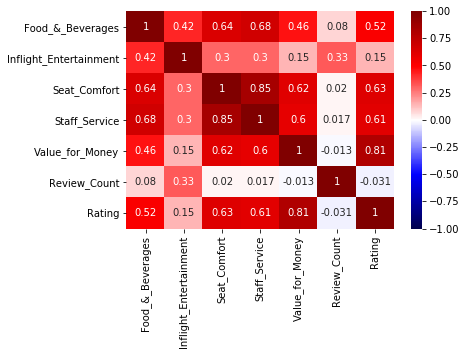

In [6]:
sns.heatmap(data.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

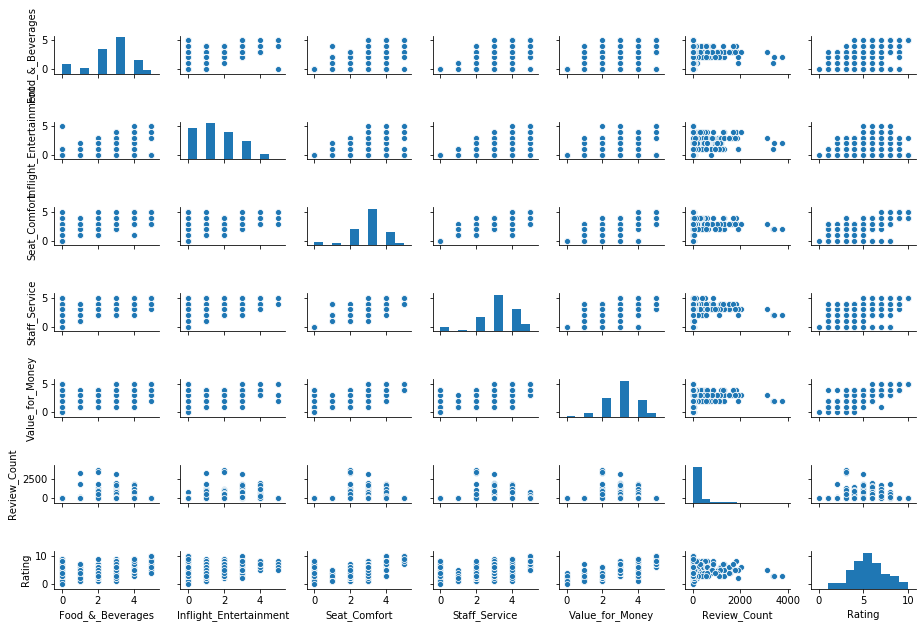

In [7]:
sns.pairplot(data, height=1.2, aspect=1.5)

In [8]:
data.columns

Index(['Food_&_Beverages', 'Inflight_Entertainment', 'Seat_Comfort',
       'Staff_Service', 'Value_for_Money', 'Review_Count', 'Rating'],
      dtype='object')

In [9]:
data.rename(inplace=True,columns={"Food_&_Beverages": "Food_N_Beverages"})

In [10]:
y,X=patsy.dmatrices('Rating ~ Food_N_Beverages + Inflight_Entertainment + Seat_Comfort + Staff_Service + Value_for_Money + Review_Count', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          7.86e-125
Time:                        10:32:19   Log-Likelihood:                -778.40
No. Observations:                 515   AIC:                             1571.
Df Residuals:                     508   BIC:                             1601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0702      0.169     -0.416      0.678      -0.402       0.261
Food_N_Beverages           0.1987      0.057      3.477      0.001       0.086       0.311
Inflight_Entertainment    -0.0746      0.048     -1.567      0.118      -0.168       0.019
Seat_Comfort               0.1768      0.094      1.881      0.061      -0.008       0.361
Staff_Service              0.1262      0.088      1.428      0.154      -0.047       0.300
Value_for_Money            1.3244      0.065     20.238      0.000       1.196       1.453
Review_Count           -9.247e-05      0.000     -0.804      0.422      -0.000       0.000
==============================================================================
Omnibus:                       52.141   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.275
Skew:                           0.374   Prob(JB):                     2.40e-43
Kurtosis:                       5.930   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y,X1=patsy.dmatrices('Rating ~ Food_N_Beverages + Inflight_Entertainment + Seat_Comfort + Value_for_Money', data=data, return_type="dataframe")
#X1=sm.add_constant(data.drop(['Rating','Staff_Service','Review_Count'],axis=1))
y=data['Rating']
model=sm.OLS(y, X1)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     278.3
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.10e-126
Time:                        10:32:19   Log-Likelihood:                -779.79
No. Observations:                 515   AIC:                             1570.
Df Residuals:                     510   BIC:                             1591.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0519      0.167     -0.312      0.755      -0.379       0.276
Food_N_Beverages           0.2254      0.054      4.154      0.000       0.119       0.332
Inflight_Entertainment    -0.0876      0.045     -1.944      0.052      -0.176       0.001
Seat_Comfort               0.2690      0.070      3.846      0.000       0.132       0.406
Value_for_Money            1.3384      0.065     20.646      0.000       1.211       1.466
==============================================================================
Omnibus:                       50.577   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.523
Skew:                           0.408   Prob(JB):                     6.92e-37
Kurtosis:                       5.663   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y,X2=patsy.dmatrices('Rating ~ Food_N_Beverages + Inflight_Entertainment + Seat_Comfort + Staff_Service + Value_for_Money', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X2)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          6.90e-126
Time:                        10:32:19   Log-Likelihood:                -778.73
No. Observations:                 515   AIC:                             1569.
Df Residuals:                     509   BIC:                             1595.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0829      0.168     -0.494      0.622      -0.413       0.247
Food_N_Beverages           0.1992      0.057      3.485      0.001       0.087       0.311
Inflight_Entertainment    -0.0871      0.045     -1.933      0.054      -0.176       0.001
Seat_Comfort               0.1780      0.094      1.895      0.059      -0.006       0.363
Staff_Service              0.1279      0.088      1.449      0.148      -0.046       0.301
Value_for_Money            1.3249      0.065     20.254      0.000       1.196       1.453
==============================================================================
Omnibus:                       53.388   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.419
Skew:                           0.392   Prob(JB):                     4.98e-44
Kurtosis:                       5.946   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y,X3=patsy.dmatrices('Rating ~ Food_N_Beverages + Seat_Comfort + Value_for_Money', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X3)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     367.7
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          3.47e-127
Time:                        10:32:19   Log-Likelihood:                -781.69
No. Observations:                 515   AIC:                             1571.
Df Residuals:                     511   BIC:                             1588.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0962      0.166     -0.581      0.562      -0.421       0.229
Food_N_Beverages     0.1914      0.052      3.716      0.000       0.090       0.293
Seat_Comfort         0.2581      0.070      3.693      0.000       0.121       0.395
Value_for_Money      1.3499      0.065     20.854      0.000       1.223       1.477
==============================================================================
Omnibus:                       54.073   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.428
Skew:                           0.466   Prob(JB):                     2.67e-37
Kurtosis:                       5.642   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y,X4=patsy.dmatrices('Rating ~ Seat_Comfort + Value_for_Money', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X4)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     531.4
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.20e-125
Time:                        10:32:19   Log-Likelihood:                -788.56
No. Observations:                 515   AIC:                             1583.
Df Residuals:                     512   BIC:                             1596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0668      0.167     -0.399      0.690      -0.396       0.262
Seat_Comfort        0.3910      0.061      6.429      0.000       0.272       0.511
Value_for_Money     1.3762      0.065     21.127      0.000       1.248       1.504
==============================================================================
Omnibus:                       46.447   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.435
Skew:                           0.268   Prob(JB):                     1.21e-41
Kurtosis:                       5.914   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y,X5=patsy.dmatrices('Rating ~ Inflight_Entertainment + Seat_Comfort + Staff_Service + Value_for_Money', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X5)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.57e-124
Time:                        10:32:19   Log-Likelihood:                -784.80
No. Observations:                 515   AIC:                             1580.
Df Residuals:                     510   BIC:                             1601.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1060      0.170     -0.625      0.532      -0.439       0.227
Inflight_Entertainment    -0.0387      0.043     -0.894      0.372      -0.124       0.046
Seat_Comfort               0.2143      0.094      2.271      0.024       0.029       0.400
Staff_Service              0.2254      0.085      2.663      0.008       0.059       0.392
Value_for_Money            1.3431      0.066     20.376      0.000       1.214       1.473
==============================================================================
Omnibus:                       51.305   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.926
Skew:                           0.227   Prob(JB):                     2.67e-56
Kurtosis:                       6.423   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y,X6=patsy.dmatrices('Rating ~ Value_for_Money', data=data, return_type="dataframe")
#X=sm.add_constant(data.drop('Rating',axis=1))
y=data['Rating']
model=sm.OLS(y, X6)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     947.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.33e-118
Time:                        10:32:19   Log-Likelihood:                -808.55
No. Observations:                 515   AIC:                             1621.
Df Residuals:                     513   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2710      0.165      1.641      0.101      -0.053       0.595
Value_for_Money     1.6354      0.053     30.774      0.000       1.531       1.740
==============================================================================
Omnibus:                       34.776   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.651
Skew:                          -0.108   Prob(JB):                     1.16e-28
Kurtosis:                       5.439   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lr=LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.687460387174689

In [18]:
lr.fit(X1,y)
lr.score(X1,y)

0.685771376434108

In [19]:
print(lr.intercept_,lr.coef_)

-0.05194337498706769 [ 0.          0.22539475 -0.08762443  0.26896099  1.33835033]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np


# hold out 20% of the data for final testing
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=.25, random_state=3)

In [22]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_scaled=scaler.fit_transform(X_model.values)
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_poly=poly.fit_transform(X_model.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [23]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.744
Ridge Regression val R^2: 0.745
Degree 2 polynomial regression val R^2: 0.775


In [24]:
lm.fit(X_model,y_model)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.521


In [25]:
lm_reg.fit(X_scaled,y_model)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.522


In [26]:
lm_poly.fit(X_poly,y_model)
print(f'Degree 2 polynomail Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomail Regression test R^2: 0.559


In [27]:
# hold out 20% of the data for final testing
X_model, X_test, y_model, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=.25, random_state=3)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_poly=poly.fit_transform(X_model.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_poly.fit(X_poly,y_model)
print(f'Degree 2 polynomail Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.766
Degree 2 polynomail Regression test R^2: 0.554


In [28]:
# hold out 20% of the data for final testing
X_model, X_test, y_model, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=.25, random_state=3)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=1) 

X_poly=poly.fit_transform(X_model.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_poly.fit(X_poly,y_model)
print(f'Degree 2 polynomail Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.744
Degree 2 polynomail Regression test R^2: 0.523


In [29]:
# hold out 20% of the data for final testing
X_model, X_test, y_model, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=.25, random_state=3)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=3) 

X_poly=poly.fit_transform(X_model.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_poly.fit(X_poly,y_model)
print(f'Degree 2 polynomail Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.472
Degree 2 polynomail Regression test R^2: 0.435


In [30]:
from sklearn.model_selection import KFold

X_mode, X_test, y_mode, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X_cv, y_cv = np.array(X_mode), np.array(y_mode)

In [31]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s = [], [] ,[]#collect the validation results for both models

for train_ind, val_ind in kf.split(X_cv,y_cv):
    
    X_train, y_train = X_cv[train_ind], y_cv[train_ind]
    X_val, y_val = X_cv[val_ind], y_cv[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #polynomial linear regression
    poly = PolynomialFeatures(degree=2) 
    lm_poly = LinearRegression()
    
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Polynomial scores: ', cv_lm_poly_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Polynomial mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

Simple regression scores:  [0.6680815700651824, 0.7647299129439469, 0.63156139305511, 0.7729357798007942, 0.6193365642653536]
Ridge scores:  [0.668095421413887, 0.7643916085871506, 0.6314063211273455, 0.7730925349435336, 0.6208635005354295]
Polynomial scores:  [-0.47497287242185277, 0.6962021386806079, 0.6772929182896261, 0.007306184754721112, 0.700097477566066] 

Simple mean cv r^2: 0.691 +- 0.065
Ridge mean cv r^2: 0.692 +- 0.065
Polynomial mean cv r^2: 0.321 +- 0.478


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.551


In [33]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
poly_score=cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')
print(f'Polynomial mean cv r^2: {np.mean(poly_score):.3f} +- {np.std(poly_score):.3f}')

Polynomial mean cv r^2: 0.666 +- 0.056


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [35]:
X=data.drop('Rating',axis=1)
y=data['Rating']

In [36]:
X_train_val_lasso, X_test_lasso, y_train_val_lasso, y_test_lasso = train_test_split(X, y, test_size=0.2,random_state=42)
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X_train_val_lasso, y_train_val_lasso, test_size=.25, random_state=43)

In [61]:
lasso_model = Lasso(alpha = 0.1) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
list(zip(X.columns, lasso_model.coef_))

[('Food_N_Beverages', 0.2630235065191629),
 ('Inflight_Entertainment', -0.0),
 ('Seat_Comfort', 0.23452273314126326),
 ('Staff_Service', 0.01604182680066015),
 ('Value_for_Money', 1.2274086227796217),
 ('Review_Count', -0.00013789084191463243)]

In [59]:
lr_model_ridge = Ridge(alpha = 0.1)
lr_model_ridge.fit(X_train_lasso, y_train_lasso)

list(zip(X_train_lasso.columns, lr_model_ridge.coef_))

[('Food_N_Beverages', 0.32814822544209415),
 ('Inflight_Entertainment', -0.10885349638852307),
 ('Seat_Comfort', 0.3036323334333991),
 ('Staff_Service', -0.01473105909861477),
 ('Value_for_Money', 1.3039115527455845),
 ('Review_Count', -5.8743545848801166e-05)]

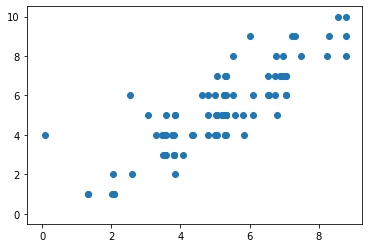

In [62]:
test_set_pred = lasso_model.predict(X_test_lasso)
plt.scatter(test_set_pred, y_test_lasso)
plt.plot(np.linspace(0,10,1), np.linspace(0,10,1),linestyle='-')

In [41]:
r2_score(y_test_lasso, test_set_pred)

0.7066684474685763

In [42]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test_lasso, test_set_pred)

0.8208557730079802

In [43]:
std = StandardScaler()
std.fit(X_train_val_lasso.values)
X_tr = std.transform(X_train_val_lasso.values)
X_te = std.transform(X_test_lasso.values)
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_tr,y_train_val_lasso)
print(list(zip(X_train_val_lasso.columns, lasso_model.coef_)))
test_set_pred = lasso_model.predict(X_te)
print(r2_score(y_test_lasso, test_set_pred))
print(mae(y_test_lasso, test_set_pred))

[('Food_N_Beverages', 0.21347841485252433), ('Inflight_Entertainment', -0.0), ('Seat_Comfort', 0.19195559132999315), ('Staff_Service', 0.09888986364445848), ('Value_for_Money', 1.1791875575383488), ('Review_Count', -0.0)]
0.7189961116094461
0.8004176538171737


In [44]:
from sklearn.pipeline import Pipeline
alphalist = 10**(np.linspace(-10,10,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train_lasso.values, y_train_lasso)
    
    val_set_pred = pipe.predict(X_val_lasso.values)
    err_vec_val[i] = mae(y_val_lasso, val_set_pred)

(0.925, 1)

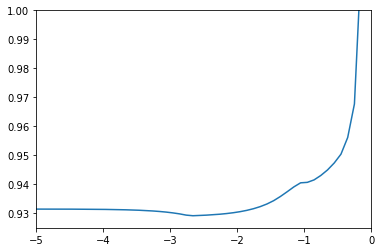

In [45]:
plt.plot(np.log10(alphalist), err_vec_val)
plt.xlim(-5,0)
plt.ylim(0.925,1)

In [46]:
np.min(err_vec_val)

0.9291621689519233

In [47]:
alphalist[np.argmin(err_vec_val)]

0.002171117945694505

In [48]:
lasso_model = Lasso(alpha = 0.002)
lasso_model.fit(X_tr,y_train_val_lasso)
print(list(zip(X_train_val_lasso.columns, lasso_model.coef_)))
test_set_pred = lasso_model.predict(X_te)
print(r2_score(y_test_lasso, test_set_pred))
print(mae(y_test_lasso, test_set_pred))

[('Food_N_Beverages', 0.3083788291537886), ('Inflight_Entertainment', -0.08960553675678443), ('Seat_Comfort', 0.2283151726111488), ('Staff_Service', 0.10162871567004071), ('Value_for_Money', 1.222711129552036), ('Review_Count', -0.04337443918468561)]
0.7134551034237712
0.7998318473991525


In [49]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train_val_lasso)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [50]:
lasso_model.alpha_

0.01

In [51]:
list(zip(X_train_val_lasso.columns, lasso_model.coef_))

[('Food_N_Beverages', 0.2983120101696005),
 ('Inflight_Entertainment', -0.07731788990083842),
 ('Seat_Comfort', 0.22467845887007667),
 ('Staff_Service', 0.10180669125084105),
 ('Value_for_Money', 1.2196751375060504),
 ('Review_Count', -0.03881317174226859)]

In [52]:
test_set_pred = lasso_model.predict(X_te)

In [53]:
mae(y_test_lasso, test_set_pred)

0.7984623371177525

In [54]:
r2_score(y_test_lasso, test_set_pred)

0.7144192065724071

In [55]:
from sklearn.linear_model import lars_path
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr,y_train_val_lasso, method='lasso')


Computing regularization path using the LARS ...


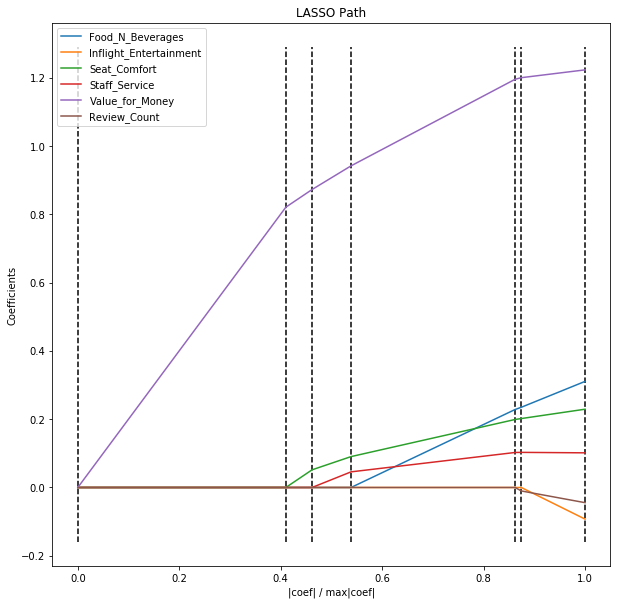

In [56]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train_val_lasso.columns)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q plot')

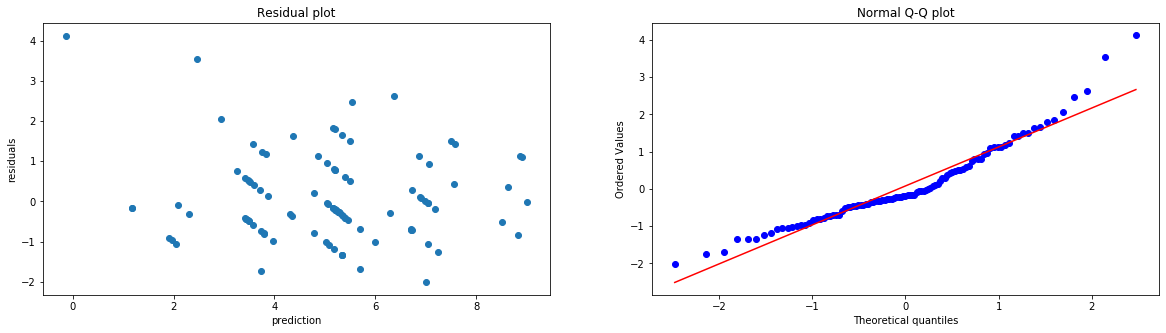

In [57]:
    import scipy.stats as stats
    plt.figure(figsize=(20,5))
    
    
    plt.subplot(1, 2, 1)
    res = y_test_lasso - test_set_pred
    plt.scatter(test_set_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")